<div style="width: 80%; display: flex; justify-content: flex-start; align-items: center; margin-left: 20%;">
    <img src="https://docs.classiq.io/resources/classiq-logo.svg" alt="classiq_logo" width="400" height="auto" style="margin-right: 50px;" />
    <img src="https://docs.classiq.io/resources/pushquantum_logo.png" alt="pushquantum_logo" width="400" height="auto" />
</div>

# Classiq Challange: Estimating Molecular Spectra Using the Rodeo Algorithm

Welcome to the Classiq challenge of the 2024 PushQuantum Hackathon!
This Jupyter notebook is the framework for the challenge and you should follow it in order to solve it using Classiq.

The notebook has 2 parts:
1. A warm-up session, just to get up to speed with a small example of Classiq
2. The challenge itself, including what you need to create, what's the format, and how you can check yourself

Additional resources you should use are
- The IDE of the classiq platform at [platform.classiq.io](https://platform.classiq.io/)
- The [community Slack of Classiq](https://short.classiq.io/join-slack) - Classiq's team will answer any question you have over there, including implementation questions
- [Classiq's documentation](https://docs.classiq.io/latest/) with the dedicated:
    - [Classiq 101](https://docs.classiq.io/latest/classiq_101/)
    -  [Python SDK Reference](https://docs.classiq.io/latest/sdk-reference/)
    -  [Our GitHub Repostory](https://github.com/Classiq/classiq-library)

Good luck!

### Challenge's Abstract

Estimating the energy eigenvalues of a Hamiltonian is a fundamental task in quantum chemistry, material science and condensed matter physics. These eigenvalues provide critical insights into the underlying system, whether it be a molecule, material, or a more general quantum system. Many applications are based on the accurate estimation on the accurate estimation of the energy values like photodynamic therapy for cancer treatment, molecular drug design, and development of efficient energy storage devices.

Quantum computers main advantage will arguably be 'to simulate nature', thus they might offer a crucial advantage in estimating the energy values of Hamiltonians representing molecules, proteins, and materials. 

The [Rodeo Algorithm](https://arxiv.org/pdf/2009.04092) is a quantum algorithm for estimating the energy eigenvalues of any given Hamiltonian within a specified energy interval. In this challenge, you will implement it using the Classiq platform! Specifically for this challenge, the Rodeo algorithm is used to solve molecular Hamiltonians.

Roughly Speaking, the Rodeo Algorithm filters linearly spaced discrete sets of energies within a given interval, isolating and refining the true eigenvalues of the Hamiltonian. The algorithm can accurately identify energy levels by iteratively "sweeping" through the energy spectrum, making it a practical approach for quantum computations.

This challenge provides an opportunity to implement a state-of-the-art quantum algorithm, bridging theoretical concepts with real-world applications in quantum computing.

This is a scheme of the Rodeo Algorithm:

<div style="text-align: center;">
    <img src="https://docs.classiq.io/resources/rodeo2.png" alt="Rodeo.png" width="600" />
</div>

<p style="text-align: center;">
Fig.1 from the original paper: <a href="https://arxiv.org/pdf/2009.04092">Rodeo Algorithm for Quantum Computing</a> by Kenneth Choi et al.
</p>

### Make Sure You Are Ready to Go

If you haven't done it yet, try running the following lines of code and use the [regestration and installation](https://docs.classiq.io/latest/classiq_101/registration_installations/) page if you are having difficulty setting up your environment.\
Uncomment and run the following command to install or update to the latest version of the Classiq SDK (if not installed yet):

In [ ]:
# pip install -U classiq

Uncomment and run the following command if your machine has not been authenticated yet:

In [ ]:
# import classiq
# classiq.authenticate()

## Challenge Warm-Up

A quick warm-up task will ensure you are ready to dive into the challenge confidently. Here’s what you need to do:

1. Create a `qfunc` named `prep`:
   - This function should prepare the $|-\rangle$ state, assuming the input state is $|0\rangle$.

2. Create a `qfunc` named `trotter`:
   - This function should utilize the `suzuki_trotter()` method.
   - Inputs: A variable of the type `QArray[QBit]`.
   - Implementation details:
     - Call the `suzuki_trotter()` function with the following parameters:
       - `HAMILTONIAN`: Use the given dummy Hamiltonian.
       - `evolution_coefficient`: Set to 1.
       - `order`: Set to 1.
       - `repetitions`: Set to 30.
       - `qbv`: Pass the declared quantum variable.

3. Create a `main` function:
   - This function should:
     - Use the `prep` function to prepare an auxiliary qubit named `aux` in the $|-\rangle$ state.
     - Use the auxiliary qubit as a `control` for the `trotter` function, which should act on another qubit. (Read more on `control`:[here](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/control/?h=control))
     - Finally, apply an `H` gate on the auxiliary qubit.

By completing this warm-up, you will practice the essential steps needed for the challenge. Take it step by step, starting simple, and then make your code robust and adaptable!

In [ ]:
from classiq import *

HAMILTONIAN = [PauliTerm([Pauli.X], 1)]  # Dummy Hamiltonian

# Hamiltonian_matrix = hamiltonian_to_matrix(HAMILTONIAN)
# print(Hamiltonian_matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [9]:
@qfunc
def prep(reg: QArray):
    """
    Prepare the register in the |-> state, first applying X to each qubit and then the Hadamard transform.

    Args: 
        reg: QArray - The register to prepare
    """
    repeat(reg.len, lambda i: X(reg[i]))
    hadamard_transform(reg)

@qfunc
def trotter(qbv: QArray[QBit]):
    """
    Apply the Suzuki-Trotter decomposition to the Hamiltonian.

    Args: 
        qbv: QArray[QBit] - The quantum bit vector to apply the Hamiltonian to
    """
    suzuki_trotter(
        pauli_operator=HAMILTONIAN,
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=qbv
    )

@qfunc
def apply_control(ctrl: QBit, target: QArray):
    """
    Apply the Suzuki-Trotter decomposition to the Hamiltonian, controlled by the control qubit.

    Args:
        ctrl: QBit - The control qubit
        target: QArray - The target register
    """
    
    control(ctrl=ctrl, stmt_block=(lambda: trotter(target)))

@qfunc
def main(x: Output[QArray]):
    a = QArray("a")
    allocate(1, a)
    allocate(1, x)
    prep(a)

    repeat(a.len, lambda i: apply_control(a[i], x))
    hadamard_transform(a)

In [10]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/879fb3f0-cea7-4217-8b8f-c9fa4fe75c89?version=0.60.1


<div style="width: 80%; display: flex; justify-content: flex-start; align-items: center; margin-left: 20%;">
    <img src="./imgs/warm_up_circuit.jpg" alt="classiq_logo" width="600" height="auto" style="margin-right: 50px;" />
</div>

<details>
<summary>Preparation Task Reminder</summary>
    
This is a reminder of the preparation task provided after the workshop:

- Design your own Quantum Phase Estimation (QPE) algorithm using the Suzuki-Trotter method as the unitary.
  - Learn more about QPE: [Wiki](https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm)
  - Refer to the Suzuki-Trotter Documentation: [Classiq Docs](https://docs.classiq.io/latest/explore/functions/qmod_library_reference/qmod_core_library/hamiltonian_evolution/suzuki_trotter/suzuki_trotter/)
- Optionally, experiment by adding an RX rotation gate to the phase register (control qubits), where the angle for the n-th rotation qubit is set to π/n.

If you've already completed these tasks, they may prove useful during the challenge. If not, consider taking this extra step to enhance your preparation. :)

</details>

While these task is not required for submission, keeping it in mind could help you adrass the more complex problem during the hackathon!

## The Challenge Itself

The challenge is composed of 2 steps:

1. In the first step, you will implement the algorithm to solve the simple Hamiltonian representing the H₂ molecule.
2. The second step will be to adapt your implementation to a more complex Hamiltonian representing the H₂O molecule

This notebook should guide you (and help you) in successfully solving the challenge.

Note that the Hamiltonians are given already in their Pauli form. Some assumptions were made to reduce the complexity and runtime for the sake of the hackathon

### Submission

You are required to submit the following:

1. Jupyter Notebook (`.ipynb`)  
    - Ensure your code and explanations are well-documented.

2. Output graphs of Averaged Energy Population Distribution (for each part of the challenge):  
    - Plot normalized population as a function of energy values.
    - Identify and mark the peaks on the graph.
    - Specify the parameters used to produce the graph.

3. Quantum program files (`.qprog`)  
   - Submit a `.qprog` file corresponding to each part of the challenge (you can use the `save_qprog` function defined below, or export it from the platform using it's GUI)

Create a `.zip` file and submit it all together in the following link: [here](https://fvrn0h72gwo.typeform.com/to/WNGZ7hIH)

In [5]:
def save_qprog(qprog, file_name):
    """
    A simple function that saves your quantum program (qprog) as a text file in a .qprog format.
    The function saves the qprog in the same directory as the current Python file you are working on.

    Inputs:
        - qprog: the quantum program (the returned value of the synthesize() function)
        - file_name: a string that determines the file name
    """
    file = open(file_name + ".qprog", "w")
    file.write(qprog)
    file.close()

### Evaluation Criteria

The evaluation criteria, in order of priority, are as follows:

- Efficient use of high-level algorithmic design concepts
- Accurate solutions for each step
- Ability to explain your solution and the decisions made
- Readability
- Creativity

<details>
<summary>Hints</summary>

- If you have completed the preparation task, use it for a smooth start.
- Try to understand the parameters of the problem and consider their significance.
- Experiment by running the algorithm with different parameter values to observe the effects.
- Identify which parts of the algorithm should be adapted for different Hamiltonians, as suggested by the paper, to optimize its results.
- It is always recommended to start simple and then try to make your code more robust and flexible.

</details>

### Part 1: Implementing the Rodeo Algorithm for a 2D Hamiltonian


In this part, you will implement the algorithm described in the paper to solve the following **2D Hamiltonian** representing the H₂ molecule:

---

#### Steps:
1. Find the eigenvalues of this Hamiltonian analytically using `hamiltonian_to_matrix(HAMILTONIAN)` and `numpy.`
2. Use Classiq’s SDK for efficient  design of the Rodeo Algorithm to estimate the eigenvalues of the Hamiltonian.

In [1]:
import numpy as np

from classiq import *

np.random.seed(0)  # Please don't change

# Define the 2D Hamiltonian
HAMILTONIAN = [
    PauliTerm([Pauli.I, Pauli.I], -1.0523),
    PauliTerm([Pauli.I, Pauli.Z], 0.3979),
    PauliTerm([Pauli.Z, Pauli.I], -0.3979),
    PauliTerm([Pauli.Z, Pauli.Z], -0.0112),
    PauliTerm([Pauli.X, Pauli.X], 0.1809),
]

hamiltonian_matrix = hamiltonian_to_matrix(HAMILTONIAN)
print(hamiltonian_matrix)

[[-1.0635+0.j  0.    +0.j  0.    +0.j  0.1809+0.j]
 [ 0.    +0.j -1.8369+0.j  0.1809+0.j  0.    +0.j]
 [ 0.    +0.j  0.1809+0.j -0.2453+0.j  0.    +0.j]
 [ 0.1809+0.j  0.    +0.j  0.    +0.j -1.0635+0.j]]


### Analytical Solution

In [2]:
def analytical_solution():
    """
    Compute the analytical solution of the Hamiltonian.

    Returns:
        - eig_val: a list of eigenvalues
        - eig_vec: a list of eigenvectors
    """
    Hamiltonian_matrix = hamiltonian_to_matrix(HAMILTONIAN)

    eig_val, eig_vec = np.linalg.eig(Hamiltonian_matrix)

    return eig_val, eig_vec

def get_uniform_superposition(eig_vec):
    """
    Compute the uniform superposition of the eigenvectors.

    Args:
        - eig_vec: a list of eigenvectors

    Returns:
        - vec: a list of the uniform superposition of the eigenvectors
    """
    vec = [0]*len(eig_vec)

    for i,e in enumerate(eig_vec):
        sum = 0
        for el in e:
            sum += el
        vec[i] = sum/2
    
    return vec

eig_val, eig_vec = analytical_solution()

for i in range(len(eig_vec)):
    print(f"Eigenvalue {i}: {eig_val[i]}")
    print(f"Eigenvector {i}: {eig_vec[:,i]}")

uniform_superposition = get_uniform_superposition(eig_vec)

print("Uniform superposition", uniform_superposition)

Eigenvalue 0: (-0.8826+0j)
Eigenvector 0: [ 0.70710678+0.j -0.        -0.j -0.        -0.j  0.70710678-0.j]
Eigenvalue 1: (-1.2444000000000002+0j)
Eigenvector 1: [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Eigenvalue 2: (-0.22499801495156269+0j)
Eigenvector 2: [-0.        -0.j  0.11152752-0.j  0.99376135+0.j -0.        -0.j]
Eigenvalue 3: (-1.8572019850484374+0j)
Eigenvector 3: [-0.        -0.j  0.99376135+0.j -0.11152752-0.j -0.        -0.j]
Uniform superposition [(0.7071067811865477+0j), (0.5526444319356822+0j), (0.4411169140380893+0j), (-5.551115123125783e-17+0j)]


### Rodeo implementation for H₂ molecule

Calculated RMS: 6.914100165021248
t_n: [12.348366421773648, 2.8011004585705632, 6.851165888740175, 15.686252394410204, 13.072905931049773]


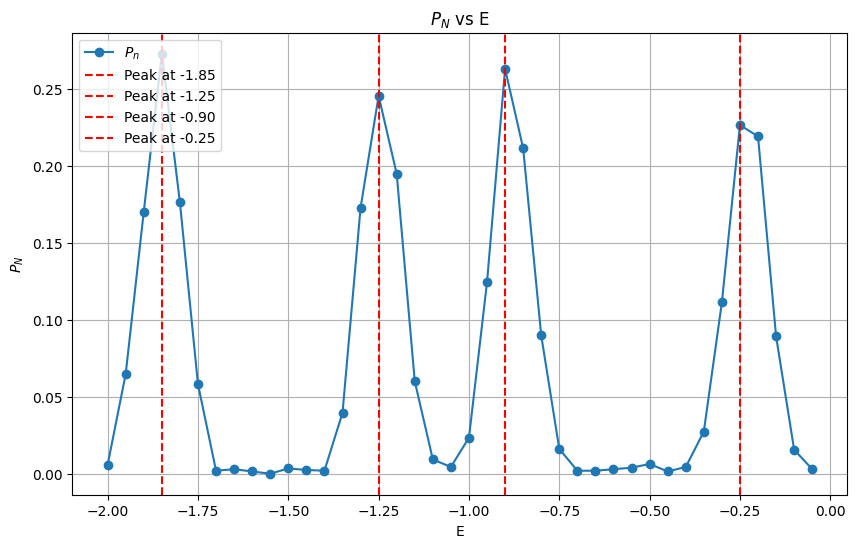

In [25]:
import numpy as np
from classiq import *
import matplotlib.pyplot as plt
from classiq.execution import ExecutionSession
from scipy.signal import find_peaks

T_RMS = 7 # RMS value of the normal distribution
N = 5 # Number of qubits

#TODO: for now we are using the eignevectors [0.70710678,0,0,0.70710678] and the corresponding eigenvalue -0.8826
# E = -0.8826
# amps = [0.70710678,0,0,0.70710678]

#TODO: or use the uniform superposition
amps = uniform_superposition

np.random.seed(0)  # Please don't change

# Define the 2D Hamiltonian
HAMILTONIAN = [
    PauliTerm([Pauli.I, Pauli.I], -1.0523),
    PauliTerm([Pauli.I, Pauli.Z], 0.3979),
    PauliTerm([Pauli.Z, Pauli.I], -0.3979),
    PauliTerm([Pauli.Z, Pauli.Z], -0.0112),
    PauliTerm([Pauli.X, Pauli.X], 0.1809),
]

def get_t_n():
    """
    Generate a list of N positive random numbers from a normal distribution with a given RMS value.

    Returns:
        - positive_t_n: a list of N positive random numbers
    """

    t_n = np.random.normal(loc=0, scale=T_RMS, size=10000)
    positive_t_n = []
    for t in t_n:
        if len(positive_t_n) >= N:
            break
        if t > 0:
            positive_t_n.append(t)

    # Re-calculate the RMS value to verify that it is close to the desired value
    calculated_rms = np.sqrt(np.mean(t_n**2)) 
    print(f"Calculated RMS: {calculated_rms}")

    return positive_t_n

@qfunc
def prep(reg: QArray):
    """
    Prepare the register in the |-> state, first applying X to each qubit and then the Hadamard transform.

    Args: 
        reg: QArray - The register to prepare
    """
    
    repeat(reg.len, lambda i: X(reg[i]))
    hadamard_transform(reg)

@qfunc
def trotter(qbv: QArray[QBit], t: CInt):
    """
    Apply the Suzuki-Trotter decomposition to time evolution of the object Hamiltonian, Hobj, for time t

    Args: 
        qbv: QArray[QBit] - The quantum bit vector to apply the Hamiltonian to
    """

    operator = [
        PauliTerm(term.pauli, term.coefficient * t) for term in HAMILTONIAN
    ]
    suzuki_trotter(
        pauli_operator=operator,
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=qbv
    )

@qfunc
def apply_control(ctrl: QBit, target: QArray, t:CInt):
    """
    Apply the Suzuki-Trotter decomposition to the Hamiltonian, controlled by the control qubit.

    Args:
        ctrl: QBit - The control qubit
        target: QArray - The target register
    """

    control(ctrl=ctrl, stmt_block=(lambda: trotter(target, t=t)))

def generate_input_data_sample(start, end, fixed_step, t_n):
    """
    Generate a data structure used as input of the batch_sample function to permoform multiple parametric executions of the algo.
    Returns also the range values used for the Energy.

    Args:
        - start: the start value of the Energy range
        - end: the end value of the Energy range 
        - fixed_step: the fixed step value for the Energy
        - t_n: a list of time values

    Returns:
        - range_values: a list of the range values used for the Energy
        - data: a list of dictionaries, each containing an element E in the range and the t_n list
    """
    range_values = np.arange(start, end, fixed_step)

    data=[]
    for e in range_values:
        data.append({"E": e, "t_n": t_n})

    return range_values, data

def aggregate_counts(range_values, sample_result):
    """
    Aggregate the counts of the sample results based on the ancilla register configuration and index it by the Energy value corresponding to the sample.

    Args:
        - range_values: a list of the range values used for the Energy
        - sample_result: the sample result

    Returns:
        - result: a dictionary with the aggregated counts indexed by the Energy value
    """
    result = {}
    for i,item in enumerate(sample_result):
        counts = item.counts
        aggregate_counts = {}
        for key,value in counts.items():
            # the key is a string in which only the last N characters represent the ancilla register configuration
            # the rest are the configuration of the target register that needs to be ignored
            aggregate_key = key[len(key)-N:] 
            if aggregate_key in aggregate_counts:
                aggregate_counts[aggregate_key] += value
            else:
                aggregate_counts[aggregate_key] = value

        result[range_values[i]] = aggregate_counts
    
    return result

def plot_sample(range_values, sample_result):
    x_values = []
    y_values = []

    # we are interested in the configuration of the ancilla that represents the eigenvalues if the hamiltonian
    # so the configuration that have N "1" in the ancilla register
    target = "1" * N

    agg_counts = aggregate_counts(range_values, sample_result)

    for key, patterns in agg_counts.items():
        x_values.append(key)
        y_values.append(patterns.get(target, 0)/2048) # normalize the counts by the number of shots

    peaks, _ = find_peaks(y_values,height=0.20)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-', label='$P_n$')

    # Add vertical red lines at peaks
    for peak in peaks:
        plt.axvline(x=x_values[peak], color='red', linestyle='--', label=f'Peak at {x_values[peak]:.2f}')

    plt.title('$P_N$ vs E')
    plt.xlabel('E')
    plt.ylabel('$P_N$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

# TODO: remember to change M in "t_n:CArray[CReal, -->M<--]" when changing the number of qubits
@qfunc
def main(a: Output[QArray],x: Output[QArray], E: CReal, t_n: CArray[CReal, 5]):
    """
    The main quantum function that implements the Rodeo algorithm.

    Args:
        a: Output[QArray] - The ancilla register
        x: Output[QArray] - The target register
        E: CReal - The energy eigenvalue used for the phase rotation
        t_n: CArray[CReal, 5] - The list of time values generated from the normal distribution with a given RMS value
    """
    # Set the initial state
    prepare_amplitudes(amplitudes=amps, bound=0.01, out=x)
        
    allocate(N, a)

    # Prepare the ancilla register in the |-> state
    prep(a)

    # Apply the Suzuki-Trotter decomposition to the Hamiltonian
    repeat(N, lambda i: apply_control(a[i], x, t=t_n[i]))

    # Apply the phase rotation
    repeat(N, lambda i: phase(a[i],E*t_n[i]))
    hadamard_transform(a)

# generate the t_n positive random values form the normal distribution with the given RMS value
t_n = get_t_n()
print(f"t_n: {t_n}")

qmod = create_model(main)
qprog = synthesize(qmod)
# show(qprog)

# save_qprog(qprog, "rodeo_h_2_uniform_superposition")
execution_session = ExecutionSession(qprog)

# Excute the algo with a single E and t_n
# sample_result = execution_session.sample({"E":E, "t_n":t_n})
# print(sample_result.parsed_counts)

# Generate the input data samples
range_values, data = generate_input_data_sample(-2, 0, 0.05, t_n)

# Execute the algo with multiple E and t_n
sample_result = execution_session.batch_sample(data)

plot_sample(range_values, sample_result)

### VQE to find the ground state energy of H₂ molecule

In [29]:
from typing import List
from classiq import *

HAMILTONIAN = QConstant(
    "HAMILTONIAN",
    List[PauliTerm],
    [
        PauliTerm([Pauli.I, Pauli.I], -1.0523),
        PauliTerm([Pauli.I, Pauli.Z], 0.3979),
        PauliTerm([Pauli.Z, Pauli.I], -0.3979),
        PauliTerm([Pauli.Z, Pauli.Z], -0.0112),
        PauliTerm([Pauli.X, Pauli.X], 0.1809),
    ],
)

@qfunc
def main(q: Output[QArray], angles: CArray[CReal, 6]) -> None:
    allocate(2, q)
    
    U(angles[0], angles[1], angles[2], 0, q[0])  # Apply to qubit 0
    U(angles[3], angles[4], angles[5], 0, q[1])  # Apply to qubit 1

@cfunc
def cmain() -> None:
    res = vqe(
        hamiltonian=HAMILTONIAN,
        maximize=False,
        initial_point=[],  # Must be initialized for some optimizers
        optimizer=Optimizer.COBYLA,  # Constrained Optimization by Linear Approximation
        max_iteration=1000,
        tolerance=0.001,
        step_size=0,  # Must be initialized as none-zero value for some optimizers
        skip_compute_variance=False,
        alpha_cvar=1.0,
    )
    save({"result": res})

def get_ground_state_energy():
    """
    Get the ground state energy from the result of the VQE algorithm.

    Returns:
        - ground_state_energy: the ground state energy
    """
    qmod = create_model(main, classical_execution_function=cmain)
    write_qmod(qmod, "vqe_two_qubits")
    qprog = synthesize(qmod)

    job = execute(qprog)

    result = job.result()[0] 
    vqe_result = result.value

    ground_state_energy = vqe_result.energy
    print("Ground State Energy:", ground_state_energy)

    eigenstate = vqe_result.eigenstate
    print("Eigenstate:", eigenstate)

    # transform the eigenstate in the form {'11': (0.04419417382415922+0j), '01': (0.9990229601966113+0j)} to an array where the frist element is the amplitude of the |00> state and the second element is the amplitude of the |01> state
    amps = [eigenstate.get('00', 0), eigenstate.get('01', 0), eigenstate.get('10', 0), eigenstate.get('11', 0)]

    return ground_state_energy, amps

ground_state_energy, amps = get_ground_state_energy()

Ground State Energy: -1.8354624023437498
Eigenstate: {'00': (0.02209708691207961+0j), '01': (0.9997558295653994+0j)}


Calculated RMS: 6.914100165021248
t_n: [12.348366421773648, 2.8011004585705632, 6.851165888740175, 15.686252394410204, 13.072905931049773]
Max eigenvalue: -1.8585858585858586
Max count: 2014


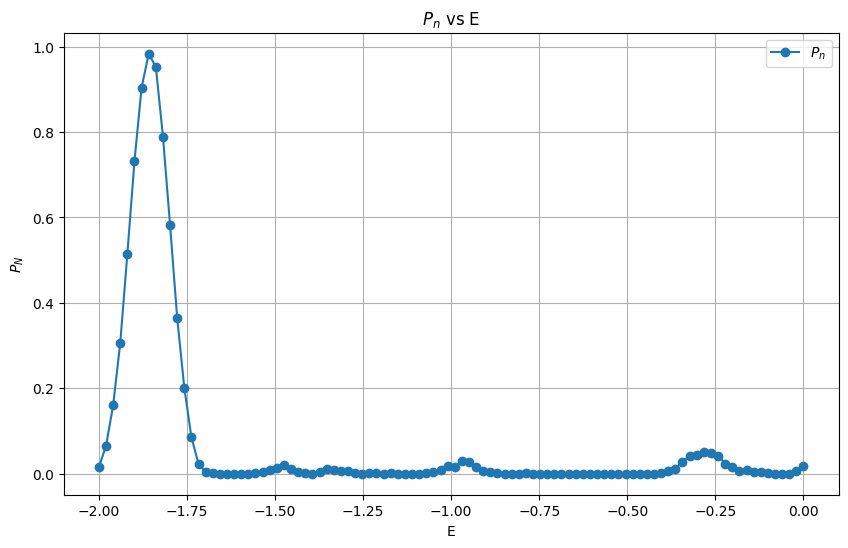

KeyboardInterrupt: 

In [ ]:
import numpy as np
from classiq import *
import matplotlib.pyplot as plt
from classiq.execution import ExecutionSession

T_RMS = 7 # RMS value of the normal distribution
N = 5 # Number of qubits

np.random.seed(0)  # Please don't change

# Define the 2D Hamiltonian
HAMILTONIAN = [
    PauliTerm([Pauli.I, Pauli.I], -1.0523),
    PauliTerm([Pauli.I, Pauli.Z], 0.3979),
    PauliTerm([Pauli.Z, Pauli.I], -0.3979),
    PauliTerm([Pauli.Z, Pauli.Z], -0.0112),
    PauliTerm([Pauli.X, Pauli.X], 0.1809),
]

def get_t_n():
    """
    Generate a list of N positive random numbers from a normal distribution with a given RMS value.

    Returns:
        - positive_t_n: a list of N positive random numbers
    """

    t_n = np.random.normal(loc=0, scale=T_RMS, size=10000)
    positive_t_n = []
    for t in t_n:
        if len(positive_t_n) >= N:
            break
        if t > 0:
            positive_t_n.append(t)

    # Re-calculate the RMS value to verify that it is close to the desired value
    calculated_rms = np.sqrt(np.mean(t_n**2)) 
    print(f"Calculated RMS: {calculated_rms}")

    return positive_t_n

@qfunc
def prep(reg: QArray):
    """
    Prepare the register in the |-> state, first applying X to each qubit and then the Hadamard transform.

    Args: 
        reg: QArray - The register to prepare
    """
    
    repeat(reg.len, lambda i: X(reg[i]))
    hadamard_transform(reg)

@qfunc
def trotter(qbv: QArray[QBit], t: CInt):
    """
    Apply the Suzuki-Trotter decomposition to time evolution of the object Hamiltonian, Hobj, for time t

    Args: 
        qbv: QArray[QBit] - The quantum bit vector to apply the Hamiltonian to
    """

    operator = [
        PauliTerm(term.pauli, term.coefficient * t) for term in HAMILTONIAN
    ]
    suzuki_trotter(
        pauli_operator=operator,
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=qbv
    )

@qfunc
def apply_control(ctrl: QBit, target: QArray, t:CInt):
    """
    Apply the Suzuki-Trotter decomposition to the Hamiltonian, controlled by the control qubit.

    Args:
        ctrl: QBit - The control qubit
        target: QArray - The target register
    """

    control(ctrl=ctrl, stmt_block=(lambda: trotter(target, t=t)))

def generate_input_data_sample(start, end, t_n):
    """
    Generate a data structure used as input of the batch_sample function to permoform multiple parametric executions of the algo.
    Returns also the range values used for the Energy.

    Args:
        - start: the start value of the Energy range
        - end: the end value of the Energy range 
        - t_n: a list of time values

    Returns:
        - range_values: a list of the range values used for the Energy
        - data: a list of dictionaries, each containing an element E in the range and the t_n list
    """
    range_values = np.linspace(start, end, 60)

    data=[]
    for e in range_values:
        data.append({"E": e, "t_n": t_n})

    return range_values, data

def aggregate_counts(range_values, sample_result):
    """
    Aggregate the counts of the sample results based on the ancilla register configuration and index it by the Energy value corresponding to the sample.

    Args:
        - range_values: a list of the range values used for the Energy
        - sample_result: the sample result

    Returns:
        - result: a dictionary with the aggregated counts indexed by the Energy value
    """
    result = {}
    for i,item in enumerate(sample_result):
        counts = item.counts
        aggregate_counts = {}
        for key,value in counts.items():
            # the key is a string in which only the last N characters represent the ancilla register configuration
            # the rest are the configuration of the target register that needs to be ignored
            aggregate_key = key[len(key)-N:] 
            if aggregate_key in aggregate_counts:
                aggregate_counts[aggregate_key] += value
            else:
                aggregate_counts[aggregate_key] = value

        result[range_values[i]] = aggregate_counts
    
    return result

def reconstruct_vector(counts):
    """
    Reconstruct the vector from the counts of the sample results.

    Args:
        - counts: the counts of the sample results

    Returns:
        - rec_state: the reconstructed vector
    """
    aggregate_counts = {}
    prefix_aggregates = {'00': 0, '01': 0, '10': 0, '11': 0}
    for key, value in counts.items():
        prefix = key[:len(key)-N]
        if prefix in prefix_aggregates:
            prefix_aggregates[prefix] += value

    amplitudes = [prefix_aggregates[prefix] / 2048 for prefix in ['00', '01', '10', '11']]
    return amplitudes

    
max_eigenvalue = 0
def plot_sample(range_values, sample_result):
    x_values = []
    y_values = []

    # we are interested in the configuration of the ancilla that represents the eigenvalues if the hamiltonian
    # so the configuration that have N "1" in the ancilla register
    target = "1" * N

    agg_counts = aggregate_counts(range_values, sample_result)

    max_eigenvalue = range_values[0]
    max_count = agg_counts[range_values[0]].get(target, 0)
    for key, patterns in agg_counts.items():
        x_values.append(key)
        count = patterns.get(target, 0)
        if count > max_count:
            max_count = count
            max_eigenvalue = key
        y_values.append(patterns.get(target, 0)/2048) # normalize the counts by the number of shots

    print(f"Max eigenvalue: {max_eigenvalue}")
    print(f"Max count: {max_count}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o', linestyle='-', label='$P_n$')
    plt.title('$P_n$ vs E')
    plt.xlabel('E')
    plt.ylabel('$P_N$')
    plt.grid(True)
    plt.legend()
    plt.show()

@qfunc
def main(a: Output[QArray],x: Output[QArray], E: CReal, t_n: CArray[CReal, 5]):
    """
    The main quantum function that implements the Rodeo algorithm.

    Args:
        a: Output[QArray] - The ancilla register
        x: Output[QArray] - The target register
        E: CReal - The energy eigenvalue used for the phase rotation
        t_n: CArray[CReal, 5] - The list of time values generated from the normal distribution with a given RMS value
    """
    # Set the initial state
    prepare_amplitudes(amplitudes=amps, bound=0.01, out=x)
        
    allocate(N, a)

    # Prepare the ancilla register in the |-> state
    prep(a)

    # Apply the Suzuki-Trotter decomposition to the Hamiltonian
    repeat(N, lambda i: apply_control(a[i], x, t=t_n[i]))

    # Apply the phase rotation
    repeat(N, lambda i: phase(a[i],E*t_n[i]))
    hadamard_transform(a)

t_n = get_t_n()
print(f"t_n: {t_n}")

qmod = create_model(main)
qprog = synthesize(qmod)
execution_session = ExecutionSession(qprog)

# the logic here is to start using VQE to find the approximated ground state and use it to retrive the other eigenvalues and eigenvectors
# exploiting the fact that the result of the VQE is a superposition of the eigenstates of the Hamiltonian so it contains an overlap with the other eigenstates too

# at every even iteration we use the rodeo algorigthm to find the eigenvalues
# then in every odd iteration we reconstruct the related eigenvector and use it to compute the new eigenstate from the initial VQE result
dict = [(-2, 0),(-1.4, -1.1),(-1,-0.7),(-0.4,0)]
index=0
for i in range(5):
    if i % 2==0:
        range_values, data = generate_input_data_sample(dict[index][0], dict[index][1], 0.01, t_n)
        sample_result = execution_session.batch_sample(data)
        plot_sample(range_values, sample_result)
        index+=1

        E = max_eigenvalue
    else:
        sample_result = execution_session.sample({"E":E, "t_n":t_n})
        rec_state = reconstruct_vector(sample_result.counts)

        ampsNP = np.array(amps, dtype=np.complex128)
        rec_stateNP = np.array(rec_state, dtype=np.complex128)

        # Compute |amps> - <rec_state|amps>|rec_state>
        amps_not_normalized = ampsNP - (np.dot(rec_stateNP, ampsNP) * rec_stateNP)
        # Normalize the result
        amps = amps_not_normalized / np.linalg.norm(amps_not_normalized)


### Part 2: Implementing the Rodeo Algorithm for a 6D Hamiltonian

In this part, you will extend the implementation of the Rodeo Algorithm to solve a more complex 6D Hamiltonian, which represents a reduced model of the water H₂O molecule.

The **goal is to find the five lowest energy levels of this Hamiltonian.**

---

In [13]:
import numpy as np

from classiq import *

np.random.seed(0)  # Please don't change

HAMILTONIAN_H2O = [
    PauliTerm([Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -12.533),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I, Pauli.I], -1.276),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.I, Pauli.I, Pauli.I, Pauli.I], 0.627),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I], -0.875),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], 0.452),
    PauliTerm([Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I, Pauli.I], 0.182),
    PauliTerm([Pauli.I, Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I], 0.139),
    PauliTerm([Pauli.Y, Pauli.Y, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -0.047),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.I], 0.209),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], -0.154),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.Z], 0.198),
    PauliTerm([Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.X, Pauli.I], 0.061),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Y, Pauli.I, Pauli.Y, Pauli.I], -0.027),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.Z], 0.118),
]

### Analytical Solution

In [14]:
Hamiltonian_matrix = hamiltonian_to_matrix(HAMILTONIAN_H2O)

eig_val, eig_vec = np.linalg.eig(Hamiltonian_matrix)
vec = zip(eig_val, eig_vec)

# for i in range(len(eig_vec)):
#     print(eig_val[i], eig_vec[:,i])

eigenvector_sum = np.sum(eig_vec, axis=1)

print("Sum of eigenvectors:", eigenvector_sum)

final_eig = 1/8 * eigenvector_sum
print("Superimposed vector: \n", final_eig)

Sum of eigenvectors: [1.52278828+0.j 1.32710704+0.j 1.53507318+0.j 0.97606704+0.j
 0.69054371+0.j 0.88976914+0.j 0.88845183+0.j 0.88249289+0.j
 1.0053884 +0.j 1.13773808+0.j 0.51350367+0.j 0.90342071+0.j
 0.77841981+0.j 0.56137851+0.j 0.89169247+0.j 0.87406369+0.j
 1.20756996+0.j 0.99866838+0.j 1.33613721+0.j 1.0599662 +0.j
 0.35353621+0.j 0.42891239+0.j 0.48098718+0.j 1.08979078+0.j
 0.71408768+0.j 1.07636336+0.j 1.05708294+0.j 1.05623323+0.j
 0.85313391+0.j 0.88849792+0.j 1.15988823+0.j 0.4646053 +0.j
 0.41296802+0.j 1.25098259+0.j 0.89173874+0.j 0.87967054+0.j
 1.05793831+0.j 1.04795311+0.j 1.29401554+0.j 0.70917955+0.j
 1.08121186+0.j 0.82011595+0.j 0.29996623+0.j 0.4679599 +0.j
 1.03364374+0.j 1.33407278+0.j 1.14584846+0.j 1.23242048+0.j
 0.86859553+0.j 0.89500909+0.j 0.78455993+0.j 0.79386766+0.j
 1.27748531+0.j 0.52918078+0.j 1.127667  +0.j 1.10326372+0.j
 0.89370212+0.j 0.9001344 +0.j 0.86478451+0.j 1.02291426+0.j
 1.04224316+0.j 1.58704315+0.j 1.33278594+0.j 1.52315437+0.j]
Su

### Test of the circuit with a specific eigenvector and corresponding eigenvalue

In [15]:
import numpy as np
from classiq import *
from classiq.execution import ExecutionSession

T_RMS = 2 
N = 5
np.random.seed(0)  # Please don't change

# Define the 6D Hamiltonian
HAMILTONIAN_H2O = [
    PauliTerm([Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -12.533),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I, Pauli.I], -1.276),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.I, Pauli.I, Pauli.I, Pauli.I], 0.627),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I], -0.875),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], 0.452),
    PauliTerm([Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I, Pauli.I], 0.182),
    PauliTerm([Pauli.I, Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I], 0.139),
    PauliTerm([Pauli.Y, Pauli.Y, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -0.047),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.I], 0.209),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], -0.154),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.Z], 0.198),
    PauliTerm([Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.X, Pauli.I], 0.061),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Y, Pauli.I, Pauli.Y, Pauli.I], -0.027),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.Z], 0.118)
]

def get_t_n(t_RMS):
    t_n = np.random.normal(loc=0, scale=t_RMS, size=10000)
    positive_t_n = []
    for t in t_n:
        if len(positive_t_n) >= N:
            break
        if t > 0:
            positive_t_n.append(t)

    calculated_rms = np.sqrt(np.mean(t_n**2))
    print(f"Calculated RMS: {calculated_rms}")

    return positive_t_n

@qfunc
def prep(reg: QArray):
    repeat(reg.len, lambda i: X(reg[i]))
    hadamard_transform(reg)

@qfunc
def trotter(qbv: QArray[QBit], t: CInt):
    operator = [
        PauliTerm(term.pauli, term.coefficient * t) for term in HAMILTONIAN_H2O
    ]
    suzuki_trotter(
        pauli_operator=operator,
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=qbv
    )

@qfunc
def apply_control(ctrl: QBit, target: QArray, t:CInt):
    control(ctrl=ctrl, stmt_block=(lambda: trotter(target, t=t)))

@qfunc
def main(a: Output[QArray], x: Output[QArray], E: CReal, t_n: CArray[CReal, 5]):

    amps = [-9.93586785e-05-0.j, -1.48008183e-16-0.j,  1.54537877e-16-0.j,
 -1.42913808e-16-0.j, -1.73009266e-16-0.j,  2.14683095e-16-0.j,
 -1.00897770e-02-0.j,  3.32012874e-16-0.j,  1.81786047e-16-0.j,
 -1.57754253e-16-0.j,  1.18987939e-06-0.j, -2.66993978e-19-0.j,
 -3.86506667e-02-0.j,  5.96288547e-18-0.j,  5.94121327e-16-0.j,
 -5.59949728e-19-0.j,  9.53280419e-18-0.j, -6.39106198e-18-0.j,
  1.79395144e-03-0.j, -3.81813758e-17-0.j,  9.60126456e-03-0.j,
  3.62709088e-18-0.j, -8.75355746e-18-0.j,  7.45327390e-18-0.j,
  6.22883776e-03-0.j, -1.05258261e-18-0.j,  1.18248736e-17-0.j,
  6.67367225e-19-0.j, -3.38864670e-18-0.j,  4.41770574e-18-0.j,
 -1.41742587e-04-0.j,  1.23301944e-19-0.j, -9.71964154e-18-0.j,
  9.95803720e-18-0.j,  1.73024249e-05-0.j,  1.32341804e-18-0.j,
  9.98855511e-01+0.j, -1.21578099e-16-0.j,  2.64000956e-17-0.j,
 -4.81895539e-18-0.j,  9.15662421e-05-0.j,  9.30601995e-18-0.j,
 -8.64428448e-18-0.j,  7.80972226e-18-0.j,  2.82657724e-17-0.j,
 -1.47522338e-17-0.j, -7.27947942e-03-0.j, -2.01254636e-17-0.j,
 -2.24659232e-02-0.j,  3.94413674e-18-0.j,  1.33564847e-18-0.j,
  1.26506471e-18-0.j,  3.41163095e-18-0.j, -3.38811621e-18-0.j,
 -4.40295885e-05-0.j, -8.27151034e-18-0.j, -3.12713059e-19-0.j,
  1.63845085e-18-0.j,  2.01686780e-04-0.j,  2.49722797e-18-0.j,
  1.42038736e-05-0.j, -5.68247601e-19-0.j,  6.70455875e-18-0.j,
 -1.01103010e-18-0.j]
    
    prepare_amplitudes(amplitudes=amps, bound=0.01, out=x)
     
    #allocate(6, x)
    allocate(N, a)
    prep(a)

    repeat(N, lambda i: apply_control(a[i], x, t=t_n[i]))
    repeat(N, lambda i: phase(a[i], E*t_n[i]))
    hadamard_transform(a)

t_n = get_t_n(T_RMS)
print(f"t_n: {t_n}")
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)
save_qprog(qprog, "rodeo_h_2_o_specific_engeinvalue")
execution_session = ExecutionSession(qprog)

E = -16.217433552022225
sample_result = execution_session.sample({"E":E, "t_n":t_n})

print(sample_result.parsed_counts)

Calculated RMS: 1.9754571900060707
t_n: [3.528104691935328, 0.8003144167344466, 1.9574759682114784, 4.481786398402916, 3.735115980299935]
Opening: https://platform.classiq.io/circuit/0498c840-bc82-4e76-bbb7-be5649874f4b?version=0.59.0
[{'a': [1, 1, 1, 1, 1], 'x': [0, 0, 1, 0, 0, 1]}: 2035, {'a': [1, 1, 1, 1, 1], 'x': [0, 0, 1, 1, 0, 0]}: 9, {'a': [1, 1, 1, 1, 1], 'x': [0, 0, 0, 0, 1, 1]}: 3, {'a': [1, 1, 1, 0, 1], 'x': [0, 0, 1, 1, 0, 0]}: 1]


### Rodeo implementation for H₂O molecule

Calculated RMS: 6.914100165021248
t_n: [12.348366421773648, 2.8011004585705632, 6.851165888740175, 15.686252394410204, 13.072905931049773, 6.650618922679126, 2.874189513568606, 1.0083049981261458]
Opening: https://platform.classiq.io/circuit/3a043a2a-9c48-48cc-9eab-effeada58ffc?version=0.59.0


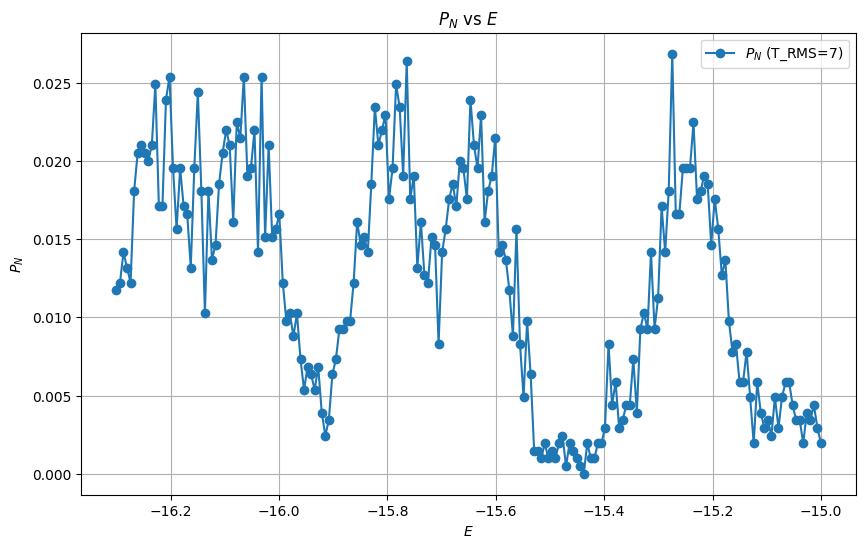

In [16]:
import numpy as np
from classiq import *
from classiq.execution import ExecutionSession
import matplotlib.pyplot as plt

T_MRS = 7
N = 8
np.random.seed(0)  # Please don't change

# Define the 6D Hamiltonian
HAMILTONIAN_H2O = [
    PauliTerm([Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -12.533),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I, Pauli.I], -1.276),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.I, Pauli.I, Pauli.I, Pauli.I], 0.627),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.I, Pauli.Z, Pauli.I], -0.875),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], 0.452),
    PauliTerm([Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I, Pauli.I], 0.182),
    PauliTerm([Pauli.I, Pauli.X, Pauli.I, Pauli.X, Pauli.I, Pauli.I], 0.139),
    PauliTerm([Pauli.Y, Pauli.Y, Pauli.I, Pauli.I, Pauli.I, Pauli.I], -0.047),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.I], 0.209),
    PauliTerm([Pauli.Z, Pauli.Z, Pauli.Z, Pauli.Z, Pauli.I, Pauli.I], -0.154),
    PauliTerm([Pauli.I, Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.Z], 0.198),
    PauliTerm([Pauli.X, Pauli.I, Pauli.I, Pauli.I, Pauli.X, Pauli.I], 0.061),
    PauliTerm([Pauli.I, Pauli.I, Pauli.Y, Pauli.I, Pauli.Y, Pauli.I], -0.027),
    PauliTerm([Pauli.Z, Pauli.I, Pauli.Z, Pauli.Z, Pauli.I, Pauli.Z], 0.118)
]

def get_t_n(t_RMS):
    t_n = np.random.normal(loc=0, scale=t_RMS, size=10000)
    positive_t_n = []
    for t in t_n:
        if len(positive_t_n) >= N:
            break
        if t > 0:
            positive_t_n.append(t)

    calculated_rms = np.sqrt(np.mean(t_n**2))
    print(f"Calculated RMS: {calculated_rms}")

    return positive_t_n

@qfunc
def prep(reg: QArray):
    repeat(reg.len, lambda i: X(reg[i]))
    hadamard_transform(reg)

@qfunc
def trotter(qbv: QArray[QBit], t: CInt):
    operator = [
        PauliTerm(term.pauli, term.coefficient * t) for term in HAMILTONIAN_H2O
    ]
    suzuki_trotter(
        pauli_operator=operator,
        evolution_coefficient=1,
        order=1,
        repetitions=30,
        qbv=qbv
    )

@qfunc
def apply_control(ctrl: QBit, target: QArray, t:CInt):
    control(ctrl=ctrl, stmt_block=(lambda: trotter(target, t=t)))

@qfunc
def main(a: Output[QArray],x: Output[QArray], E: CReal, t_n: CArray[CReal, 9]):

    amps = [0.19034854+0.j, 0.16588838+0.j, 0.19188415+0.j, 0.12200838+0.j,
 0.08631796+0.j, 0.11122114+0.j, 0.11105648+0.j, 0.11031161+0.j,
 0.12567355+0.j, 0.14221726+0.j, 0.06418796+0.j, 0.11292759+0.j,
 0.09730248+0.j, 0.07017231+0.j, 0.11146156+0.j, 0.10925796+0.j,
 0.15094625+0.j, 0.12483355+0.j, 0.16701715+0.j, 0.13249577+0.j,
 0.04419203+0.j, 0.05361405+0.j, 0.0601234 +0.j, 0.13622385+0.j,
 0.08926096+0.j, 0.13454542+0.j, 0.13213537+0.j, 0.13202915+0.j,
 0.10664174+0.j, 0.11106224+0.j, 0.14498603+0.j, 0.05807566+0.j,
 0.051621  +0.j, 0.15637282+0.j, 0.11146734+0.j, 0.10995882+0.j,
 0.13224229+0.j, 0.13099414+0.j, 0.16175194+0.j, 0.08864744+0.j,
 0.13515148+0.j, 0.10251449+0.j, 0.03749578+0.j, 0.05849499+0.j,
 0.12920547+0.j, 0.1667591 +0.j, 0.14323106+0.j, 0.15405256+0.j,
 0.10857444+0.j, 0.11187614+0.j, 0.09806999+0.j, 0.09923346+0.j,
 0.15968566+0.j, 0.0661476 +0.j, 0.14095838+0.j, 0.13790797+0.j,
 0.11171276+0.j, 0.1125168 +0.j, 0.10809806+0.j, 0.12786428+0.j,
 0.1302804 +0.j, 0.19838039+0.j, 0.16659824+0.j, 0.1903943 +0.j]
    
    prepare_amplitudes(amplitudes=amps, bound=0.01, out=x)
    #allocate(6, x)
        
    allocate(N, a)
    prep(a)

    repeat(N, lambda i: apply_control(a[i], x, t=t_n[i]))
    repeat(N, lambda i: phase(a[i], E*t_n[i]))
    hadamard_transform(a)

t_n = get_t_n(T_MRS)
print(f"t_n: {t_n}")
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)
save_qprog(qprog, "rodeo_h_2_o_range_engeinvalue")
execution_session = ExecutionSession(qprog)

start = -16.3
end = -15

range_values = np.linspace(start, end, 200)

# Sample the quantum program for each tn for the first T_RMS value
data = []

for e in range_values:
    data.append({"E": e, "t_n": t_n})

sample_result = execution_session.batch_sample(data)

result = {}
for i, item in enumerate(sample_result):
    counts = item.counts
    polished_counts = {}
    for key, value in counts.items():
        polished_key = key[len(key)-N:]
        if polished_key in polished_counts:
            polished_counts[polished_key] += value
        else:
            polished_counts[polished_key] = value
    result[range_values[i]] = polished_counts

x_values = []
y_values = []

target = '1'*N
for key, patterns in result.items():
    x_values.append(key)
    y_values.append(patterns.get(target, 0) / 2048)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', label='$P_N$ (T_RMS=7)')
plt.title('$P_N$ vs $E$')
plt.xlabel('$E$')
plt.ylabel('$P_N$')
plt.grid(True)
plt.legend()
plt.show()